In [ ]:
# Implement stock market prediction using Long Short-Term Memory (LSTM).

[*********************100%***********************]  1 of 1 completed

Epoch 1/10



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - loss: 0.0511
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0028
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0025
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 0.0022
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0020
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0019
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0017
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0015
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0026
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0016
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step


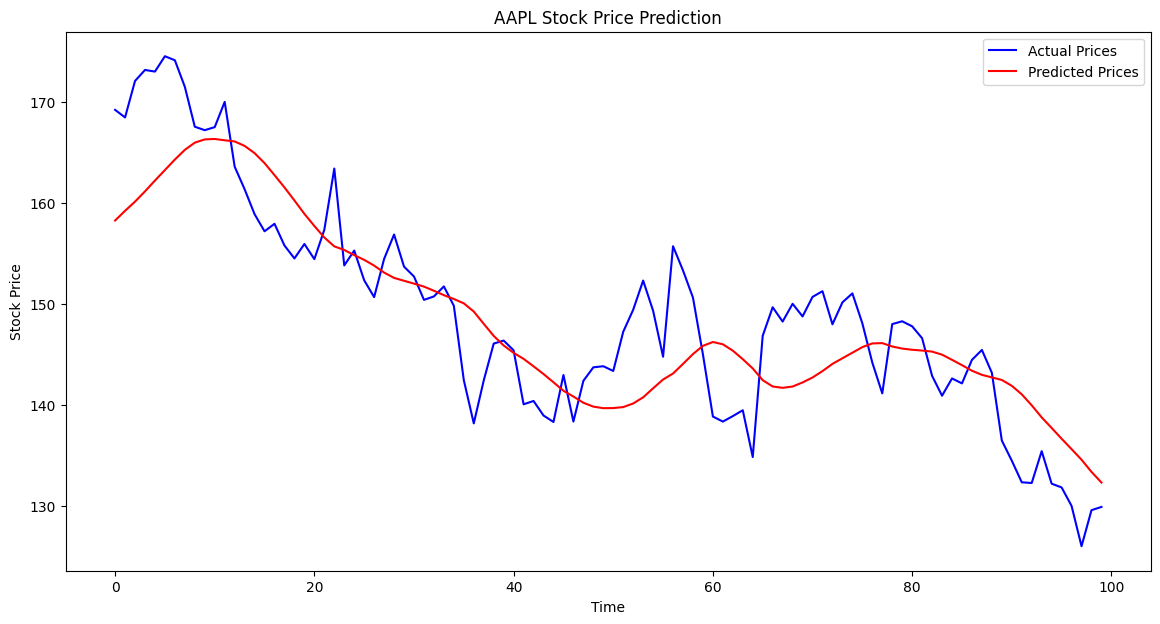

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-01-01")
prices = data["Close"].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(prices)
sequence_length = 60
x_train, y_train = [], []
for i in range(sequence_length, len(scaled_data)):
  x_train.append(scaled_data[i-sequence_length:i, 0])
  y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
model = Sequential([
LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
Dropout(0.2),
LSTM(50, return_sequences=False),
Dropout(0.2),
Dense(25),
Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size=32, epochs=10)
test_data = scaled_data[len(scaled_data) - sequence_length - 100:]
x_test, y_test = [], []
for i in range(sequence_length, len(test_data)):
  x_test.append(test_data[i-sequence_length:i, 0])
  y_test.append(test_data[i, 0])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
plt.figure(figsize=(14, 7))
plt.plot(data["Close"].values[-len(y_test):], color="blue", label="Actual Prices")
plt.plot(predicted_prices, color="red", label="Predicted Prices")
plt.title(f"{ticker} Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()